In [1]:
import os
import sys
src_path = sys.path[0].replace("notebooks", "src")
data_path = sys.path[0].replace("notebooks", "data")
if src_path not in sys.path:
    sys.path.append(src_path)

from data_loader import *
import sys
import os
from datetime import datetime,timedelta
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
temp = input("Which building are you interested in?")
if len(temp)!=0:
    Build = temp
else:
    Build = "Gilman" #Default value
#unsolved: how to show the information of building as soon as input building name?
# Present basic information of target building
temp = input("Start time for building load(Y-m-d H:M)")
if len(temp)!=0:
    start = datetime.strptime(temp)
else:
    start=datetime(2019,3,1,0,0) #Default value
temp = input("End time for building load(Y-m-d H:M)")
if len(temp)!=0:
    end = datetime.strptime(temp)
else:
    end = datetime(2020,2,29,23,45) #Default value
temp = input("time interval of load data(end with day/hour/min)")
if len(temp)==0:
    data_delta = 0.25
elif temp[-1].lower()=='h' or temp[-4:].lower()=='hour':
    data_delta = int(temp[:-1])
elif temp[-3:].lower()=='min':
    data_delta = int(temp[:-3])/60
elif temp[-3:].lower()=='day':
    data_delta = int(temp[:-3])*24
else:
    print('Unrecognized time interval')
#字典 update 不定长关键词输入
dataload = UCSD_dataloader(tstart=start,tend=end, delta=data_delta, bld=Build, pv=Build, ev=["OSLER"], pv_to_bld=0.5, ev_to_bld=None)

d:\THU\THUCB\Battery_sizing\src\data_loader.py:86: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  time_range = pd.date_range(


In [3]:
DailyPs = dataload.load_bld
DailyPf = DailyPs.to_frame(name='load')
temp = input("Length of load profile: how many days in one cycle?")
if len(temp)!=0:
    cycle = int(temp)
else:
    cycle = 1 #Default value
DailyPf.insert(loc=1, value=(DailyPs.index-start).days/cycle, column='Cycle')
DailyPf.insert(loc=2, value=DailyPs.index.hour*4+DailyPs.index.minute/15, column='data serial number')
DailyP_reshape = DailyPf.pivot(index='Cycle', columns='data serial number', values='load')
DailyP = DailyP_reshape.to_numpy()
# apply index.?

In [4]:
import math

delete_date = [0]
for i in range(0,DailyP.shape[0]):
    for j in range(0,DailyP.shape[1]):
        if math.isnan(DailyP[i][j]) == True:
            delete_date.append(i)
            break
        else:
            continue
DailyP_NoNaN = np.delete(DailyP, delete_date, axis=0)
#清理所有含0日数据，所有剩余数据均为有效日用电量(1847)

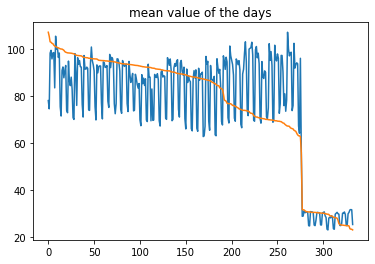

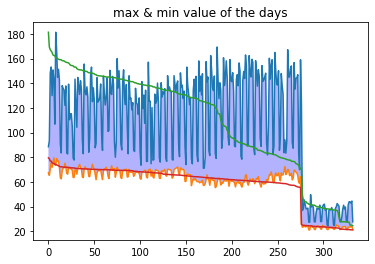

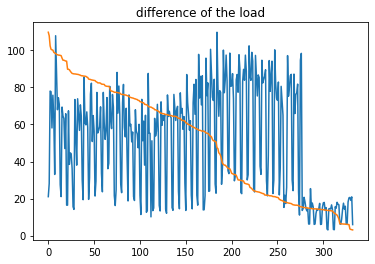

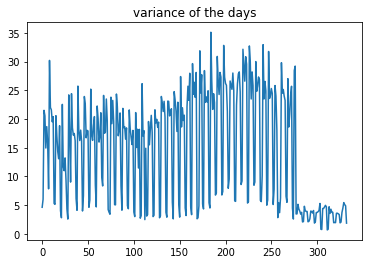

In [5]:
ax = plt.gca()
a = np.empty(len(DailyP_NoNaN))
for i in range(len(DailyP_NoNaN)):
    a[i] = np.mean(DailyP_NoNaN[i])
plt.plot(a)
a = np.sort(a)[::-1]
plt.plot(a)
plt.title("mean value of the days")
plt.show()

for i in range(len(DailyP_NoNaN)):
    b = np.amax(DailyP_NoNaN,axis=1)
    c = np.amin(DailyP_NoNaN,axis=1)
    e = b-c
plt.plot(b)
plt.plot(c)
plt.fill_between(np.arange(len(DailyP_NoNaN)),b,c,facecolor='blue',alpha=0.3)
b = np.sort(b)[::-1]
c = np.sort(c)[::-1]
plt.plot(b)
plt.plot(c)
plt.title("max & min value of the days")
plt.show()

plt.plot(e)
e = np.sort(e)[::-1]
plt.plot(e)
plt.title("difference of the load")
plt.show()

for i in range(len(DailyP_NoNaN)):
    a[i] = np.std(DailyP_NoNaN[i])
plt.plot(a)
plt.title("variance of the days")
plt.show()

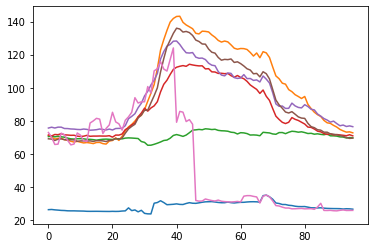

In [7]:
from sklearn.cluster import KMeans

ClusterNum = int(input("Clustering number"))
kmeans = KMeans(n_clusters=ClusterNum)
kmeans.fit(DailyP_NoNaN)

for k in range(0,ClusterNum):
    plt.plot(kmeans.cluster_centers_[k])
plt.show()

In [29]:
import sys
sys.path[0]
fn = os.path.join(data_path,"UCSD_raw_data", "BLD_","Gilman",".csv" )
fn

'd:\\THU\\THUCB\\Battery_sizing\\data\\UCSD_raw_data\\BLD_Gilman.csv'

In [34]:
temp = input("Which building are you interested in?")
if len(temp)!=0:
    Build = temp
else:
    Build = 'Gilman' #Default value
df = pd.read_csv(os.path.join(data_path,"UCSD_raw_data", "BLD_"+ Build +".csv" ))
df

,DateTime,RealPower
0,1/1/2015 0:00,59.985
1,1/1/2015 0:15,60.862
2,1/1/2015 0:30,81.294
3,1/1/2015 0:45,80.789
4,1/1/2015 1:00,76.188
...,...,...
178551,2/29/2020 22:45,26.746
178552,2/29/2020 23:00,26.500
178553,2/29/2020 23:15,26.440
178554,2/29/2020 23:30,26.516
